In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls
%cd /content/drive/MyDrive/Yolo-neuronowe/
%ls

head_dataset/  Heads.v2i.yolov5pytorch/  tutorial.ipynb
/content/drive/MyDrive/Yolo-neuronowe
head_dataset/  Heads.v2i.yolov5pytorch/  tutorial.ipynb


In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 16308, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 16308 (delta 96), reused 96 (delta 33), pack-reused 16103
Receiving objects: 100% (16308/16308), 15.09 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (11127/11127), done.
/content/drive/MyDrive/Yolo-neuronowe/yolov5
Updating files: 100% (139/139), done.
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.5 MB/s eta 0:00:00
Setup complete. Using torch 2.1.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nlxBN6Fih6sqVOtWS33B")
project = rf.workspace("name-8qzog").project("heads-x3tzb")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 754.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycl

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Heads-1 in yolov5pytorch:: 100%|██████████| 529/529 [00:03<00:00, 138.20it/s]


In [ ]:
%cd /content/drive/MyDrive/Yolo-neuronowe/yolov5

/content/drive/MyDrive/Yolo-neuronowe/yolov5


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- head
nc: 1
roboflow:
  license: CC BY 4.0
  project: heads-x3tzb
  url: https://universe.roboflow.com/name-8qzog/heads-x3tzb/dataset/1
  version: 1
  workspace: name-8qzog
test: ../test/images
train: Heads-1/train/images
val: Heads-1/valid/images


In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#this is the model configuration we will use for our tutorial
%cat %cd /content/drive/MyDrive/Yolo-neuronowe/yolov5/models/yolov5s.yaml

cat: %cd: No such file or directory
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'near

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/Yolo-neuronowe/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/drive/MyDrive/Yolo-neuronowe/yolov5/
!python train.py --img 420 --batch 16 --epochs 400 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/drive/MyDrive/Yolo-neuronowe/yolov5
2024-01-16 11:52:34.137522: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 11:52:34.137588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 11:52:34.139508: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 11:52:35.695661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/drive/MyDrive/Yolo-neuronowe/yolov5/Heads-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=420, re

# Evaluate Custom YOLOv5 Detector Performance

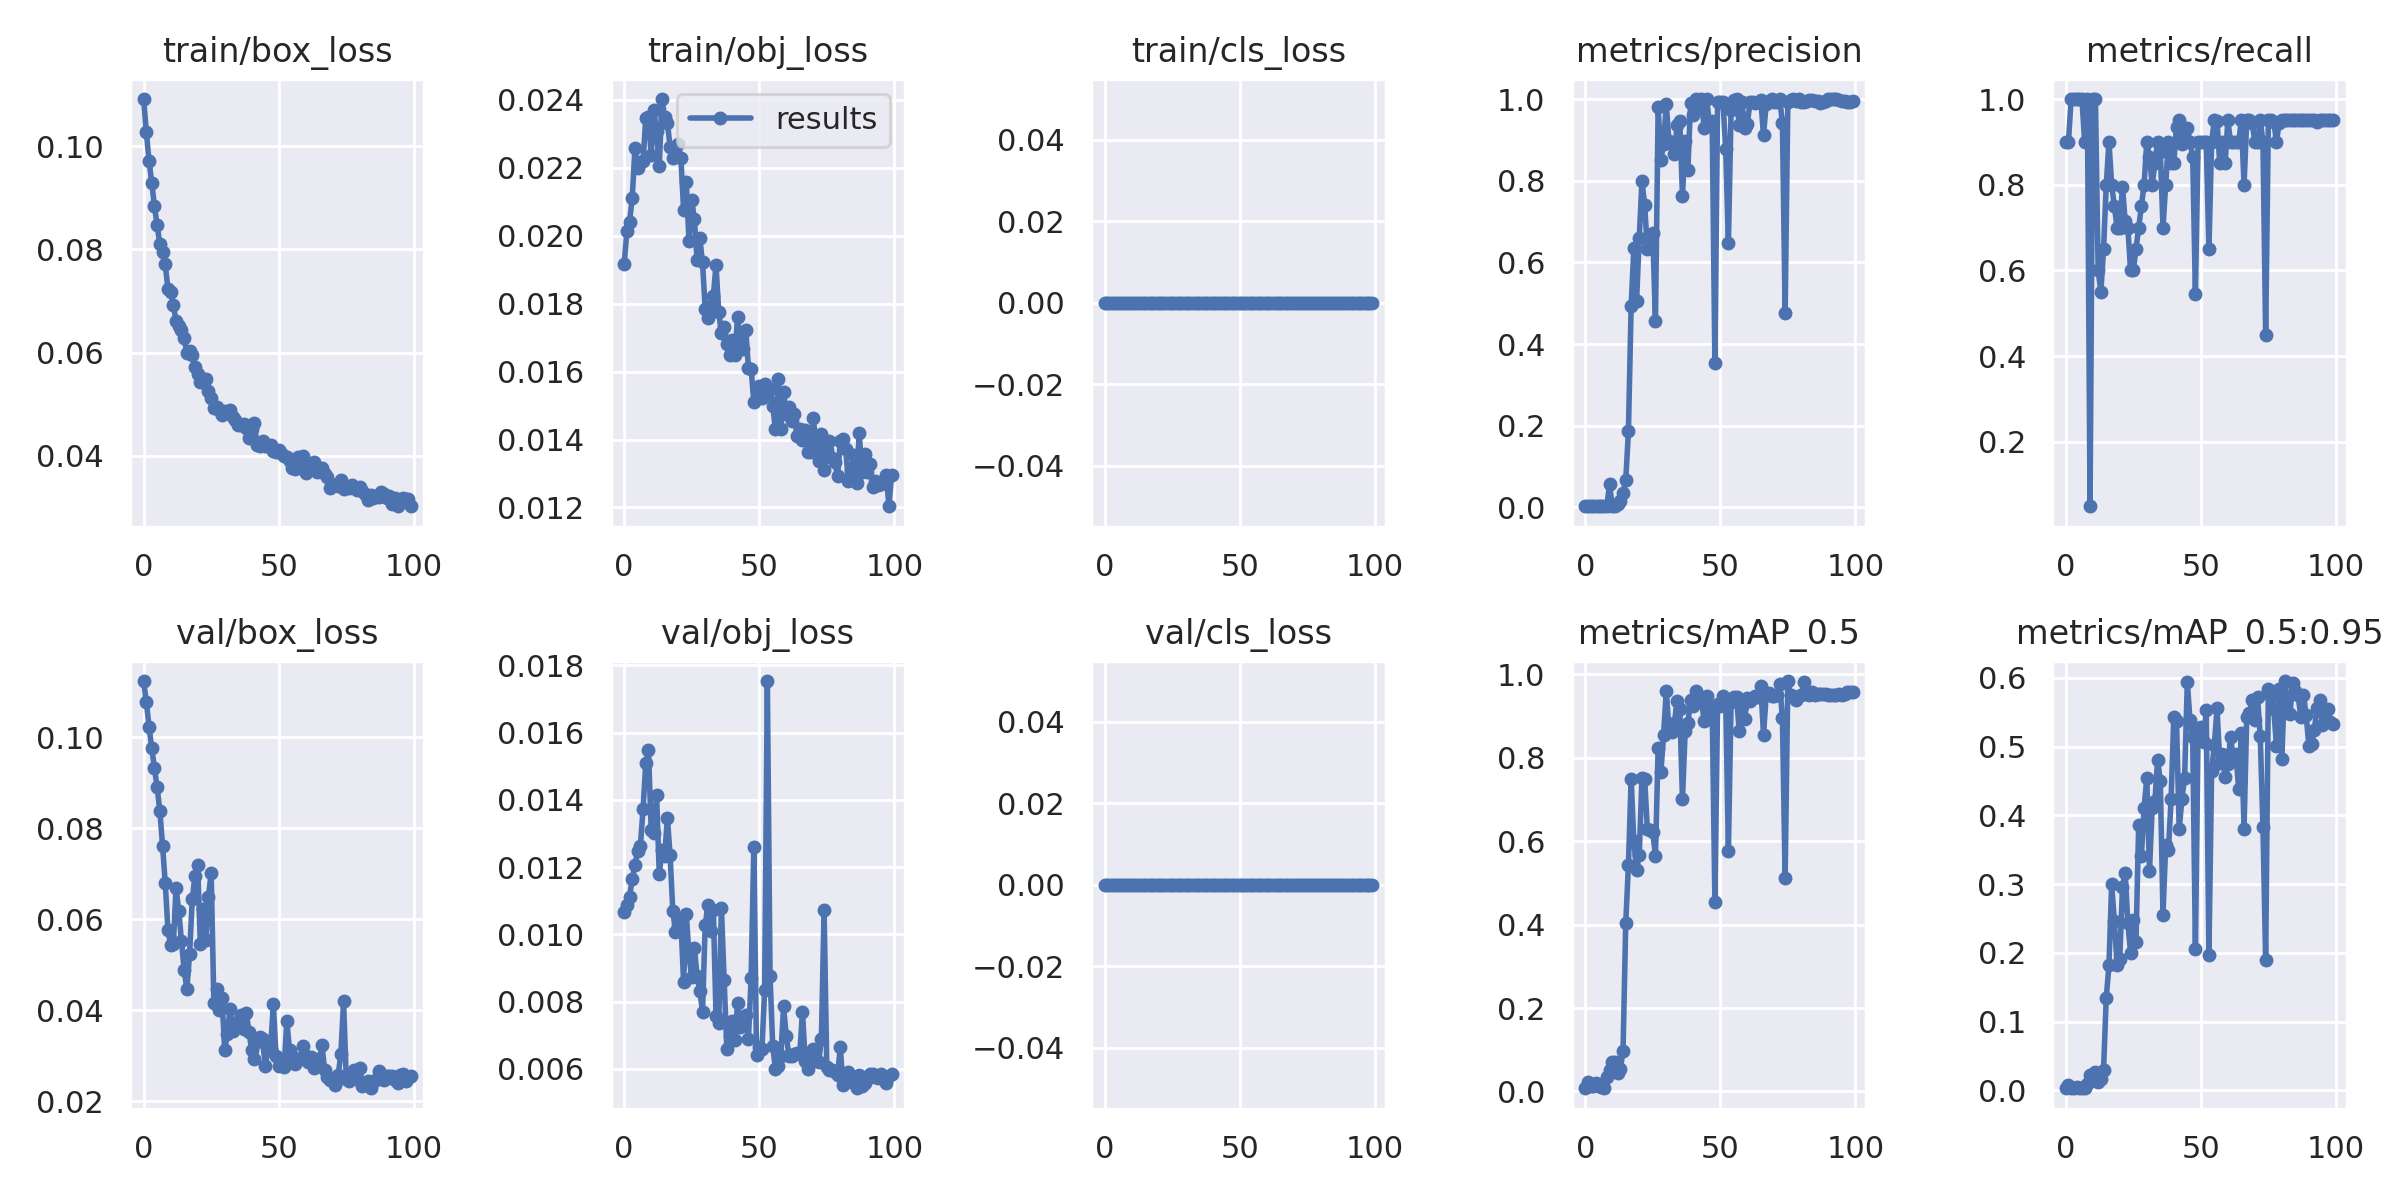

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

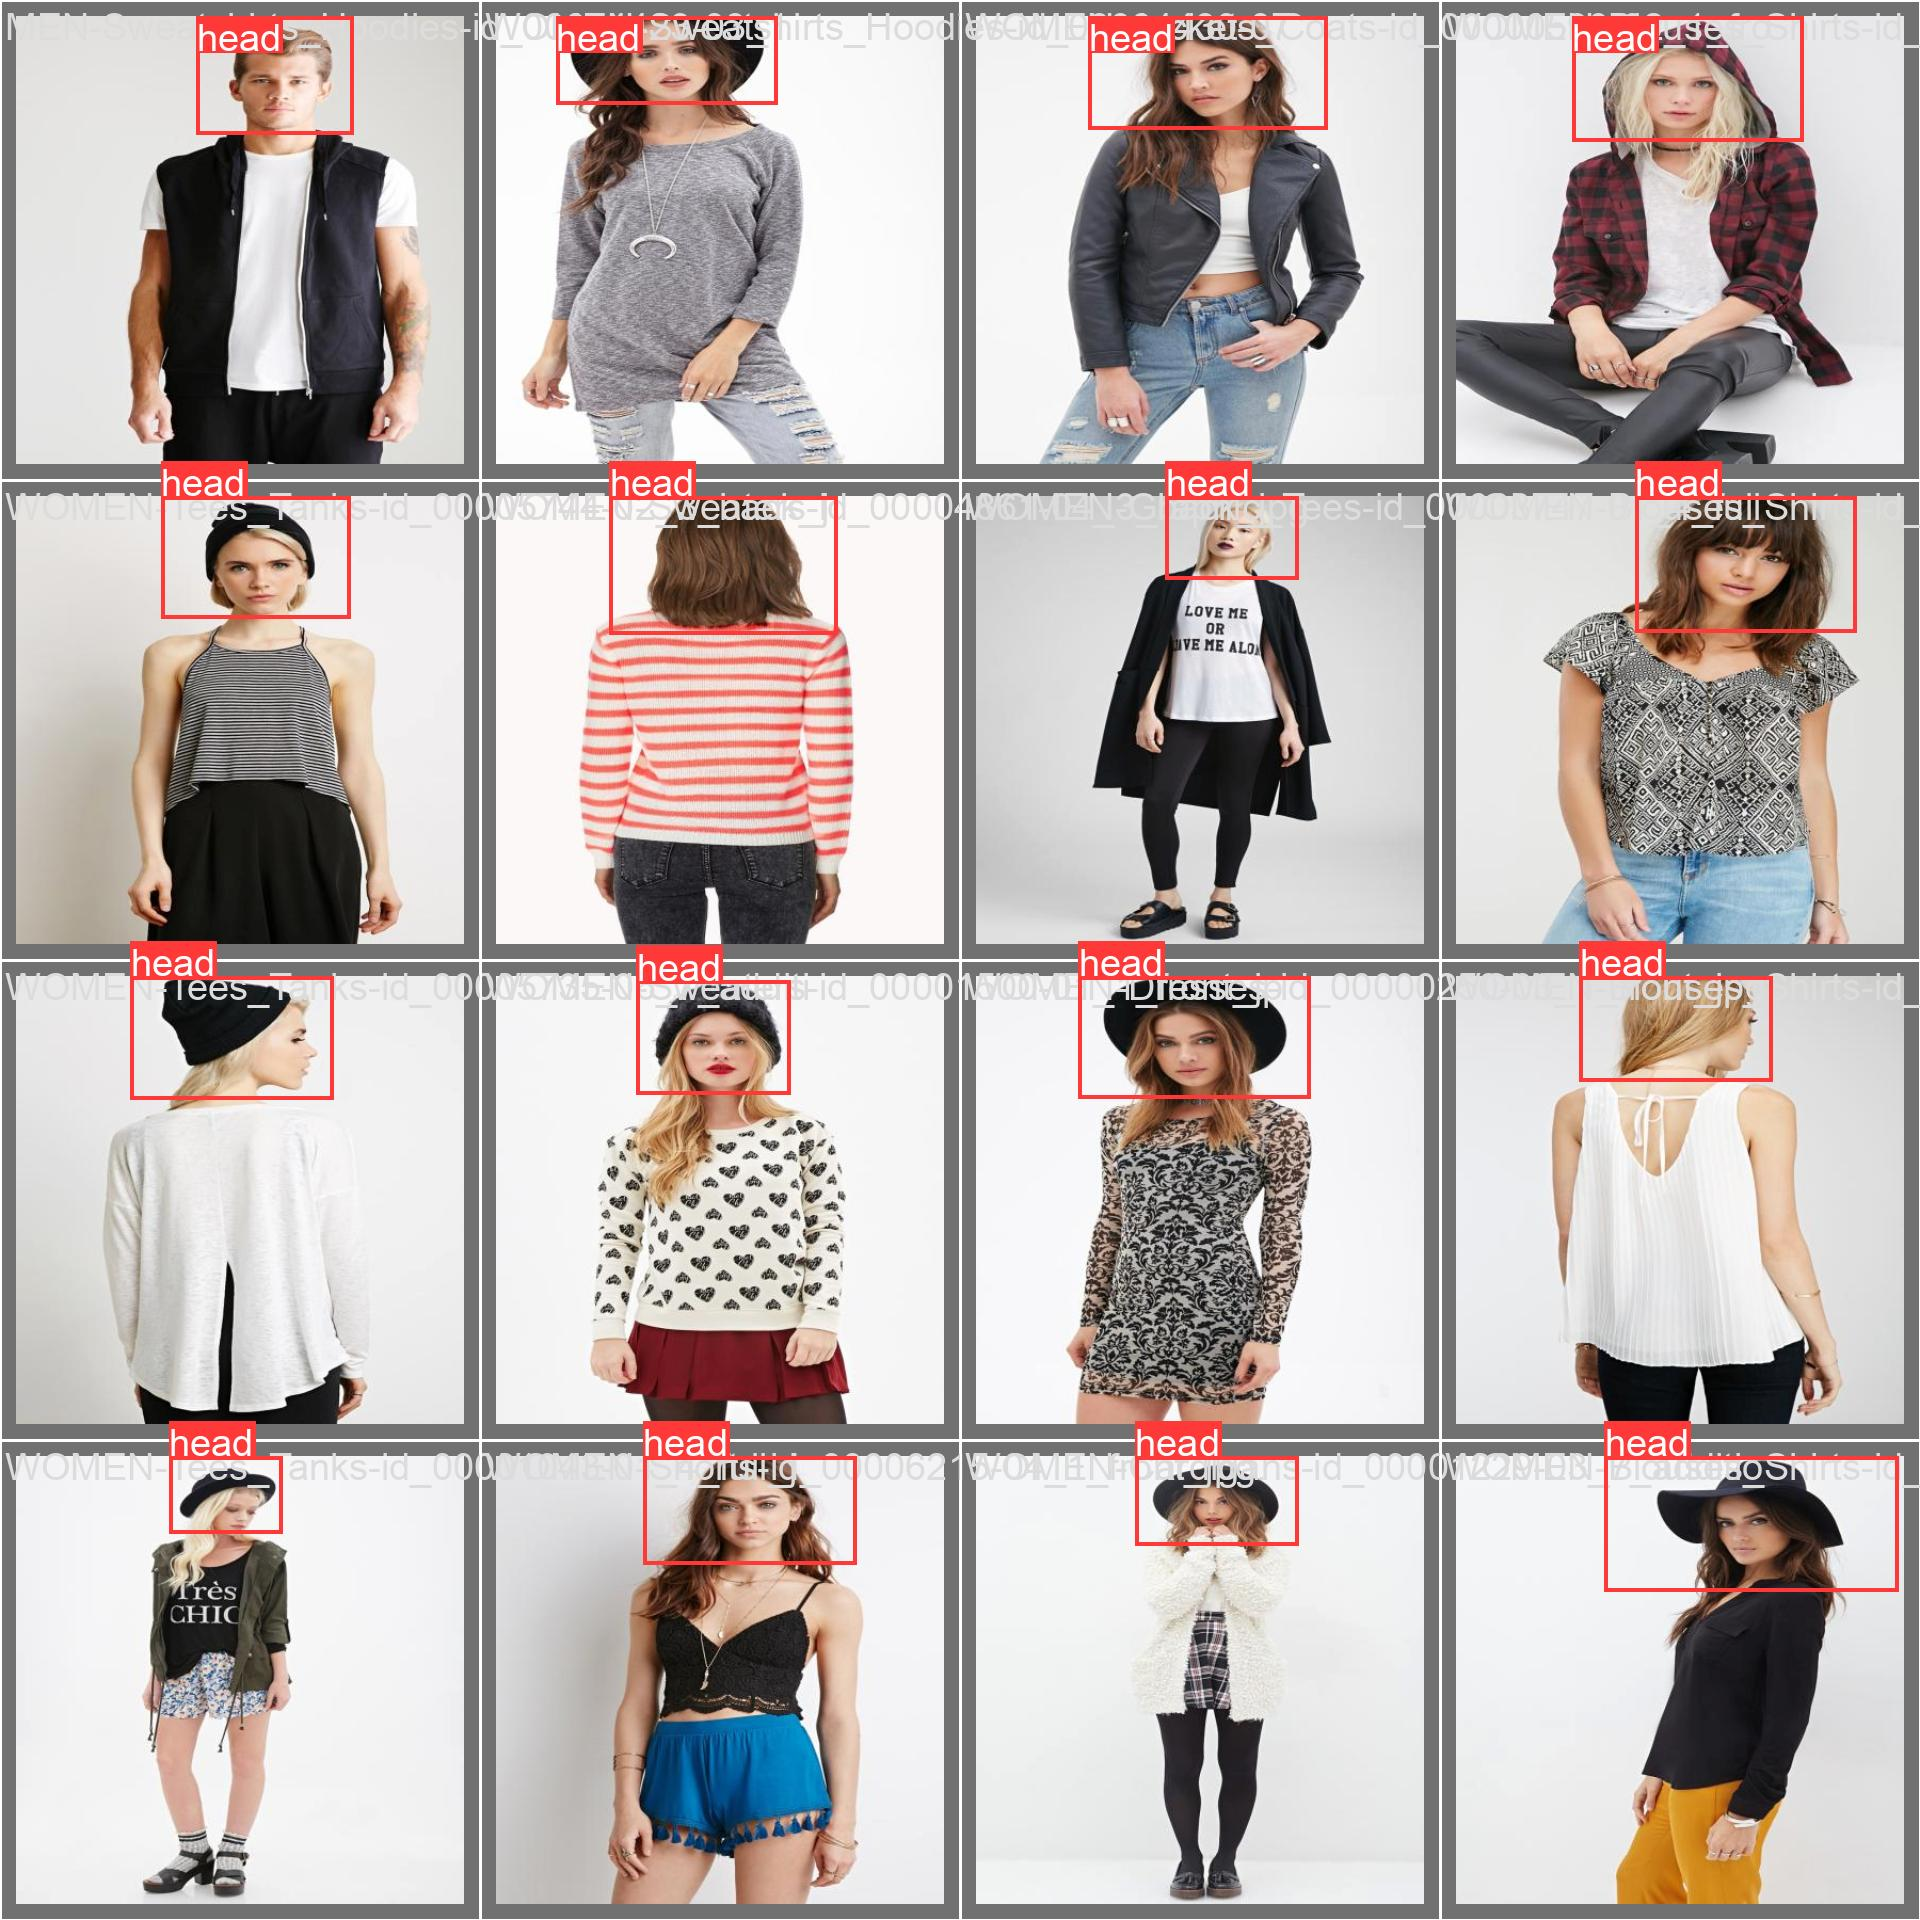

In [ ]:
Image(filename='/content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


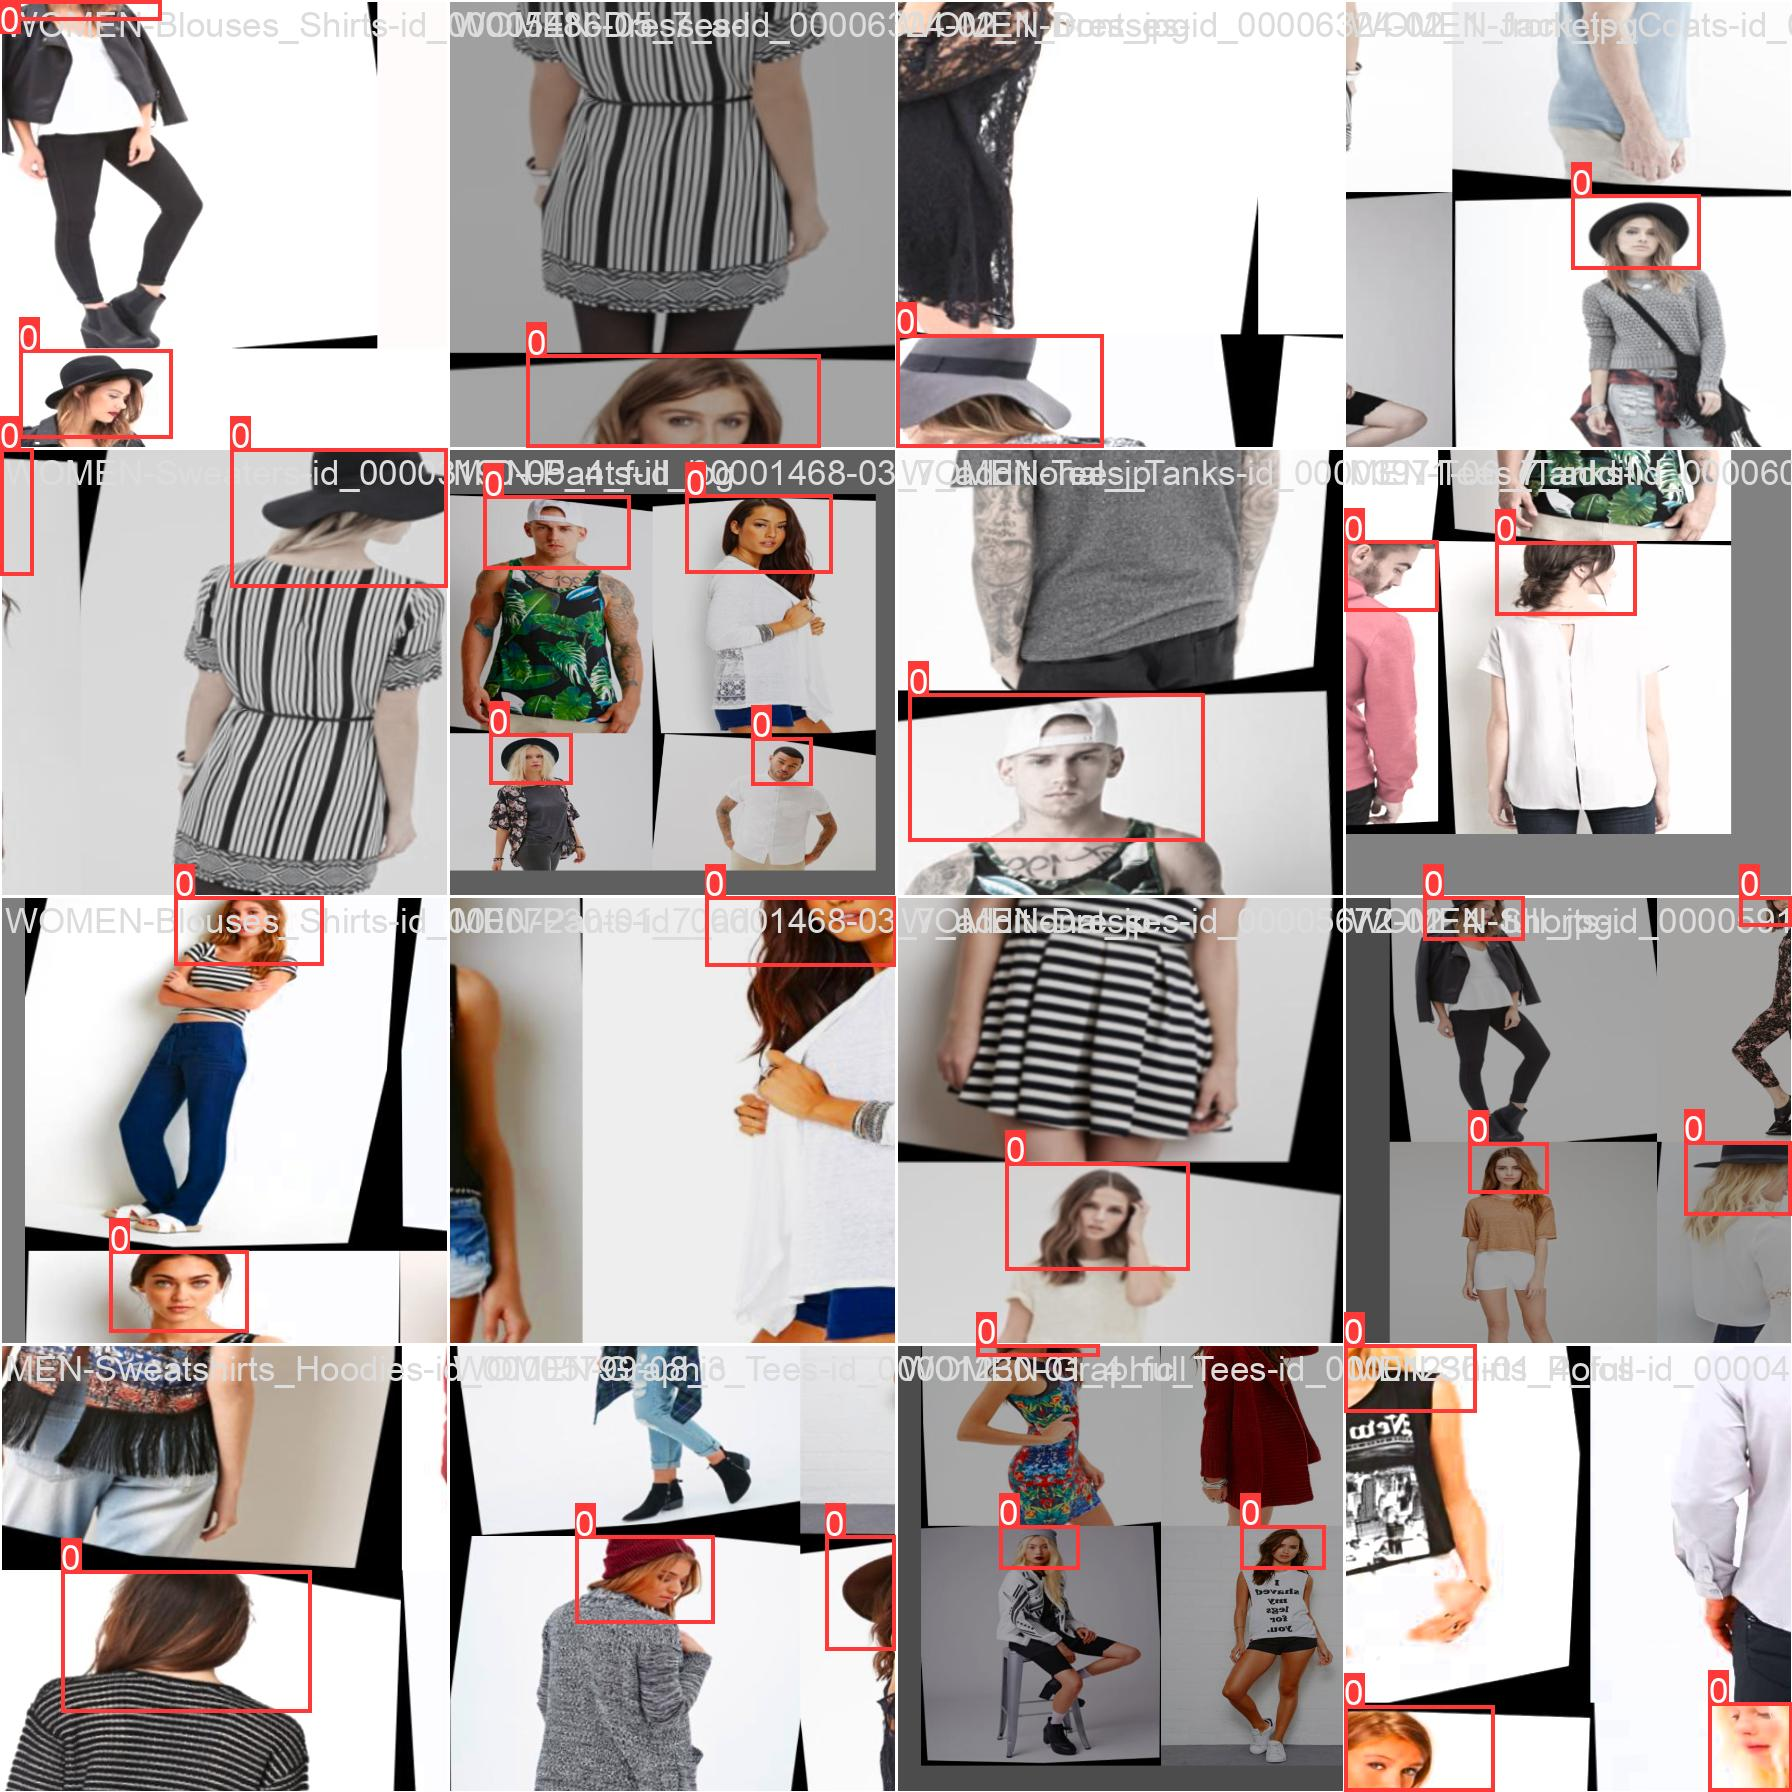

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In the snippet below, replace `Cash-Counter-10` with the name of the folder in which your dataset is stored.

In [ ]:
%cd /content/drive/MyDrive/Yolo-neuronowe/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 420 --conf 0.3 --source /content/drive/MyDrive/GANy/val/valB/ --save-crop

/content/drive/MyDrive/Yolo-neuronowe/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/GANy/val/valB/, data=data/coco128.yaml, imgsz=[420, 420], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
WARNING ⚠️ --img-size [420, 420] must be multiple of max stride 32, updating to [448, 448]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/979 /content/drive/.shortcut-targets-by-id/107UyZV543_6NHV0UZvkH0ce5wCau2ozo/GANy/val/valB/MEN-Denim-id_00002735-01_1_front.jpg: 448x320 

In [ ]:
%pwd

'/content/drive/MyDrive/Yolo-neuronowe/yolov5'

In [ ]:
from google.colab import drive
import os
import random
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
base_path = '/content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/detect/'  # Adjust this path to your Google Drive folder
source_folders = ['exp12/crops/head', 'exp13/crops/head', 'exp14/crops/head', 'exp15/crops/head']
dest_folders = ['train/trainA', 'train/trainB', 'val/valA', 'val/valB']


# Create destination folders and log
for folder in dest_folders:
    folder_path = os.path.join(base_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created folder: {folder_path}")

# Function to copy and equalize images
def equalize_and_copy_images(src_folder, dest_folder, number_of_images):
    src_path = os.path.join(base_path, src_folder)
    dest_path = os.path.join(base_path, dest_folder)
    images = os.listdir(src_path)
    selected_images = random.sample(images, number_of_images)
    for img in selected_images:
        shutil.copy(os.path.join(src_path, img), dest_path)
    print(f"Copied {number_of_images} images from {src_folder} to {dest_folder}")

# Equalize images between trainA and trainB, valA and valB
num_images_train = min(len(os.listdir(os.path.join(base_path, source_folders[0]))),
                       len(os.listdir(os.path.join(base_path, source_folders[1]))))
print(f"Number of images for train folders: {num_images_train}")

num_images_val = min(len(os.listdir(os.path.join(base_path, source_folders[2]))),
                     len(os.listdir(os.path.join(base_path, source_folders[3]))))
print(f"Number of images for val folders: {num_images_val}")

equalize_and_copy_images(source_folders[0], dest_folders[0], num_images_train)
equalize_and_copy_images(source_folders[1], dest_folders[1], num_images_train)
equalize_and_copy_images(source_folders[2], dest_folders[2], num_images_val)
equalize_and_copy_images(source_folders[3], dest_folders[3], num_images_val)

# Zip the new structure and log
zip_path = os.path.join(base_path, 'my_dataset')
shutil.make_archive(zip_path, 'zip', os.path.join(base_path, 'train'))
shutil.make_archive(zip_path, 'zip', os.path.join(base_path, 'val'))
print(f"Created zip file at {zip_path}.zip")




Mounted at /content/drive
Created folder: /content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/detect/train/trainA
Created folder: /content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/detect/train/trainB
Created folder: /content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/detect/val/valA
Created folder: /content/drive/MyDrive/Yolo-neuronowe/yolov5/runs/detect/val/valB
Number of images for train folders: 2910
Number of images for val folders: 714


KeyboardInterrupt: 

In [ ]:
import os
import shutil
import tempfile


# Define paths
base_path = '/content/drive/My Drive/Yolo-neuronowe/yolov5/runs/detect/'  # Adjust this path to your Google Drive folder
train_path = os.path.join(base_path, 'train')
val_path = os.path.join(base_path, 'val')
zip_path = os.path.join(base_path, 'my_dataset')

# Utworzenie archiwum ZIP zawierającego foldery 'train' i 'val'
with tempfile.TemporaryDirectory() as temp_dir:
    # Skopiowanie zawartości folderu 'train' do tymczasowego folderu
    train_temp_path = os.path.join(temp_dir, 'train')
    shutil.copytree(train_path, train_temp_path)

    # Skopiowanie zawartości folderu 'val' do tymczasowego folderu
    val_temp_path = os.path.join(temp_dir, 'val')
    shutil.copytree(val_path, val_temp_path)

    # Utworzenie archiwum ZIP
    shutil.make_archive(zip_path, 'zip', temp_dir)

print(f"Created zip file at {zip_path}.zip")


Created zip file at /content/drive/My Drive/Yolo-neuronowe/yolov5/runs/detect/my_dataset.zip
